# **Customer Segmentation Analysis using K-Means Clustering on Mall Customer Data**

* Perform K-Means clustering on the Mall Customers dataset to segment customers based on their Annual Income and Spending Score.
* We will determine the optimal number of clusters using the Elbow Method, visualize the clusters, and evaluate the clustering performance using the Silhouette Score.
* We will also analyze the characteristics of each identified customer segment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
url = "https://raw.githubusercontent.com/SiddardhaShayini/Customer-Segmentation-Analysis-using-K-Means-Clustering-on-Mall-Customer-Data/refs/heads/main/Dataset/Mall_Customers.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
# For K-Means clustering, 'Annual Income (k$)' and 'Spending Score (1-100)' are usually
# the most relevant features for customer segmentation in this dataset.
# Let's select these features for clustering.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# It's good practice to scale the data for K-Means as it's a distance-based algorithm.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

In [8]:

print("\nScaled features head:")
X_scaled_df.head()


Scaled features head:


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


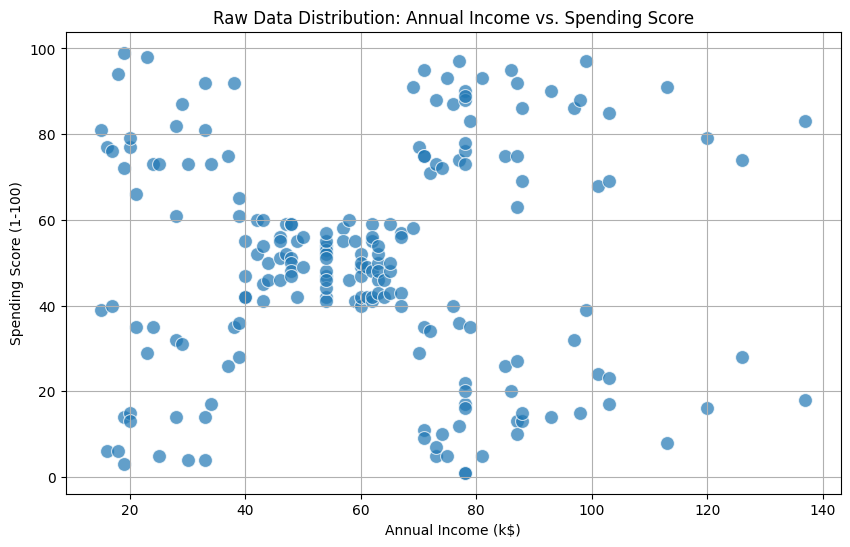

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)
plt.title('Raw Data Distribution: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

### Use the Elbow Method to find optimal K

In [10]:
wcss = [] # Within-cluster sum of squares
for i in range(1, 11): # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init for robust centroid initialization
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

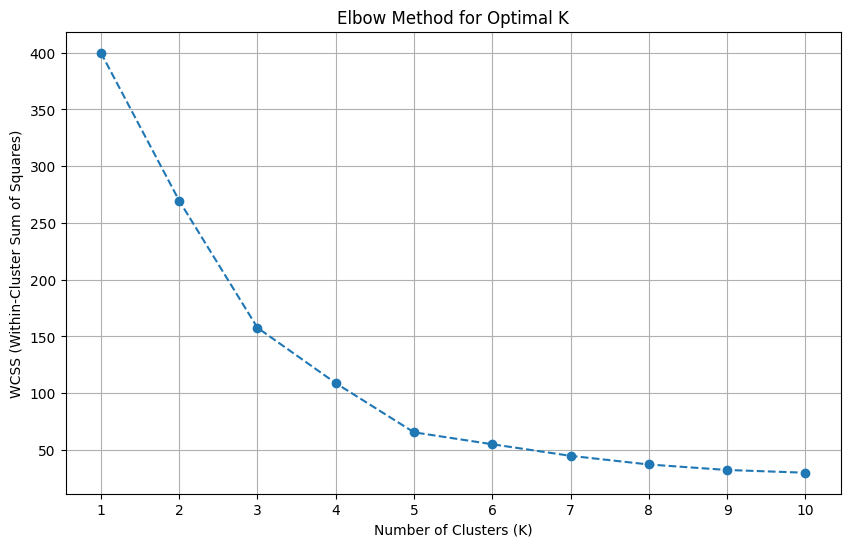

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [12]:
print("From the Elbow Method plot, we observe a significant bend (elbow) around K=5.")
optimal_k = 5
print(f"Chosen optimal K: {optimal_k}")

From the Elbow Method plot, we observe a significant bend (elbow) around K=5.
Chosen optimal K: 5


### Fit K-Means and assign cluster labels

In [13]:

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("Cluster labels assigned successfully.")

Cluster labels assigned successfully.


In [14]:
# Add cluster centroids for visualization
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df['Cluster'] = range(optimal_k)

### Visualize clusters with color-coding

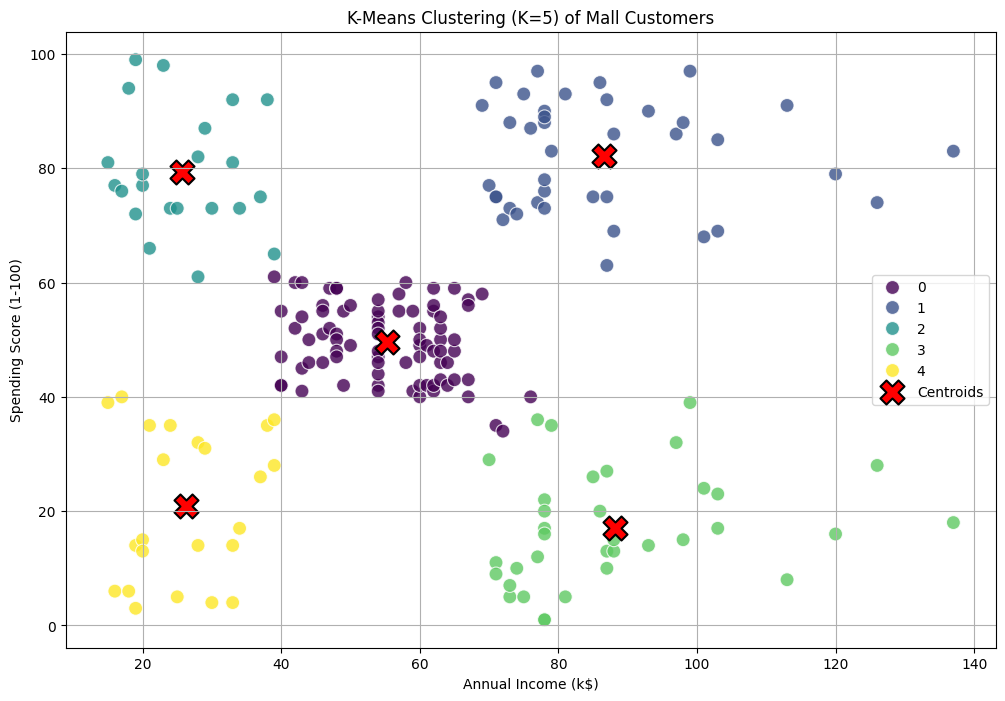

In [15]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.8, legend='full')
plt.scatter(centroids_df['Annual Income (k$)'], centroids_df['Spending Score (1-100)'],
            marker='X', s=300, color='red', label='Centroids', edgecolor='black', linewidth=1.5)
plt.title(f'K-Means Clustering (K={optimal_k}) of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend()
plt.show()

### Evaluate clustering using Silhouette Score

In [16]:
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.555


* A higher Silhouette Score indicates better-defined clusters.
* Scores typically range from -1 to 1.
 - Close to +1: The sample is far away from the neighboring clusters.
 - Close to 0: The sample is on or very close to the decision boundary between two neighboring clusters.
 - Close to -1: The sample is assigned to the wrong cluster.

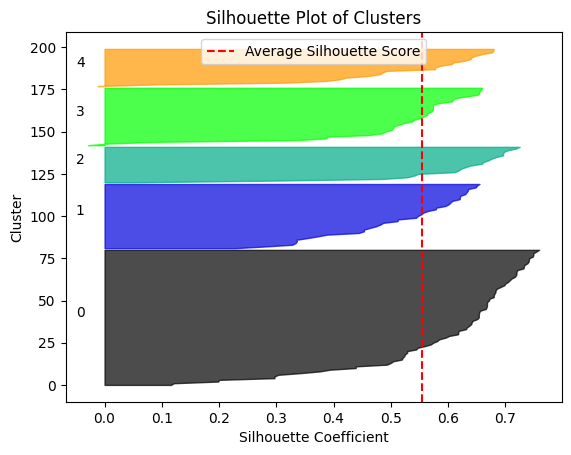

In [32]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Compute silhouette scores for each point
sample_silhouette_values = silhouette_samples(X_scaled, df['Cluster'])
n_clusters = len(set(df['Cluster']))

y_lower = 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot of Clusters")
plt.legend()
plt.show()


In [17]:
cluster_summary = df.groupby('Cluster').agg(
    Avg_Age=('Age', 'mean'),
    Avg_Annual_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending_Score=('Spending Score (1-100)', 'mean'),
    Gender_Distribution=('Gender', lambda x: x.value_counts().to_dict()),
    Count=('Cluster', 'size')
).reset_index()

In [18]:
print("\nCluster Summary Statistics:")
print(cluster_summary)


Cluster Summary Statistics:
   Cluster    Avg_Age  Avg_Annual_Income  Avg_Spending_Score  \
0        0  42.716049          55.296296           49.518519   
1        1  32.692308          86.538462           82.128205   
2        2  25.272727          25.727273           79.363636   
3        3  41.114286          88.200000           17.114286   
4        4  45.217391          26.304348           20.913043   

          Gender_Distribution  Count  
0  {'Female': 48, 'Male': 33}     81  
1  {'Female': 21, 'Male': 18}     39  
2   {'Female': 13, 'Male': 9}     22  
3  {'Male': 19, 'Female': 16}     35  
4   {'Female': 14, 'Male': 9}     23  


<ipython-input-19-9e12f04748b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Avg_Spending_Score', data=cluster_summary, palette='viridis')


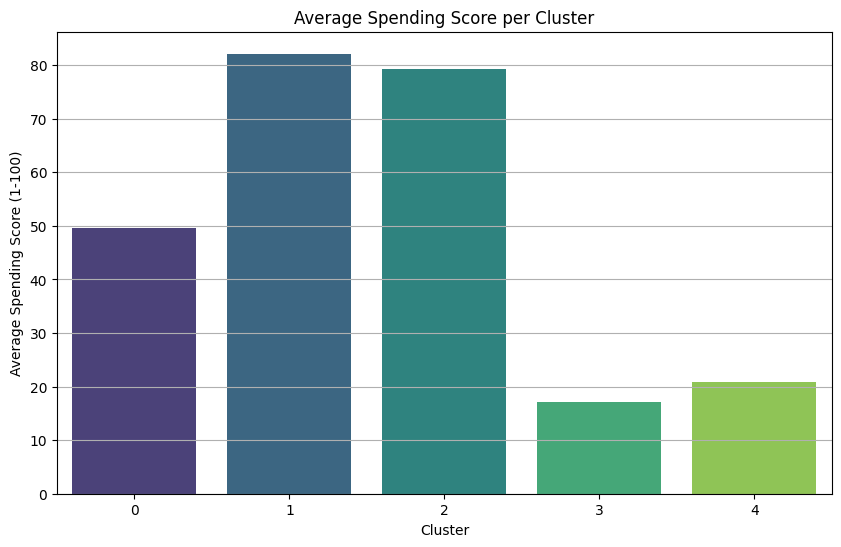

In [19]:
# Visualize cluster characteristics (e.g., average spending score per cluster)
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Avg_Spending_Score', data=cluster_summary, palette='viridis')
plt.title('Average Spending Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.grid(axis='y')
plt.show()

<ipython-input-20-6422ea4426cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Avg_Annual_Income', data=cluster_summary, palette='viridis')


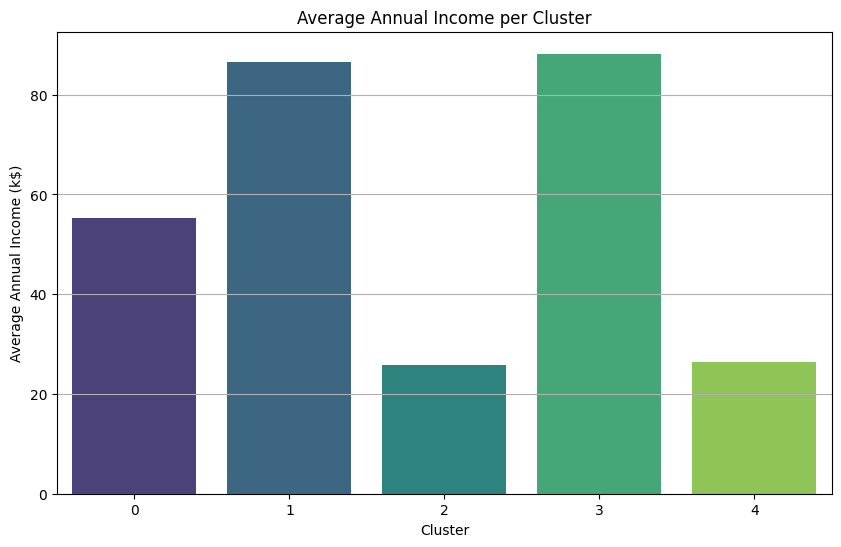

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Avg_Annual_Income', data=cluster_summary, palette='viridis')
plt.title('Average Annual Income per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Annual Income (k$)')
plt.grid(axis='y')
plt.show()

In [21]:
# Further analysis of gender distribution within clusters
gender_cluster = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
gender_cluster_percentage = gender_cluster.apply(lambda x: 100 * x / x.sum(), axis=1)

In [22]:
print("\nGender Distribution per Cluster (Counts):")
print(gender_cluster)
print("\nGender Distribution per Cluster (Percentages):")
print(gender_cluster_percentage)


Gender Distribution per Cluster (Counts):
Gender   Female  Male
Cluster              
0            48    33
1            21    18
2            13     9
3            16    19
4            14     9

Gender Distribution per Cluster (Percentages):
Gender      Female       Male
Cluster                      
0        59.259259  40.740741
1        53.846154  46.153846
2        59.090909  40.909091
3        45.714286  54.285714
4        60.869565  39.130435


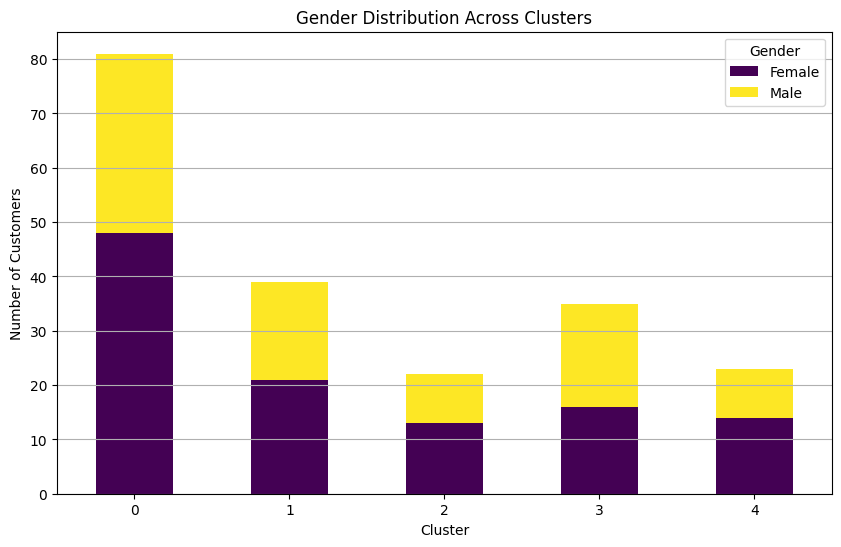

In [23]:
# Plotting gender distribution
gender_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()

<ipython-input-24-9077ac8f4b95>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


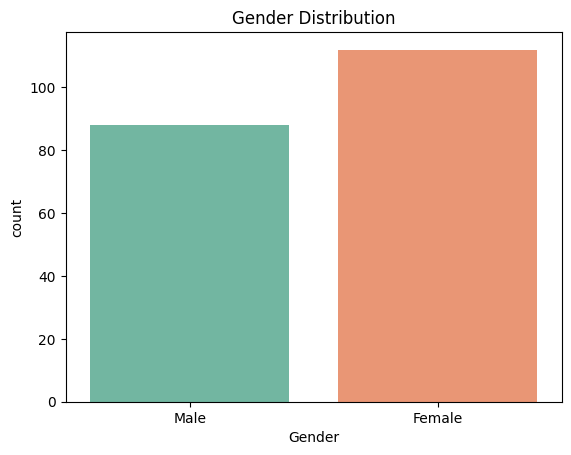

In [24]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

<ipython-input-25-0c60c4a9eb9d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set1')


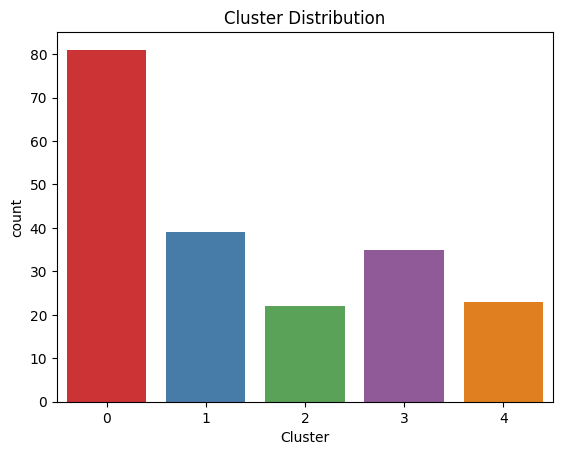

In [25]:
sns.countplot(data=df, x='Cluster', palette='Set1')
plt.title("Cluster Distribution")
plt.show()

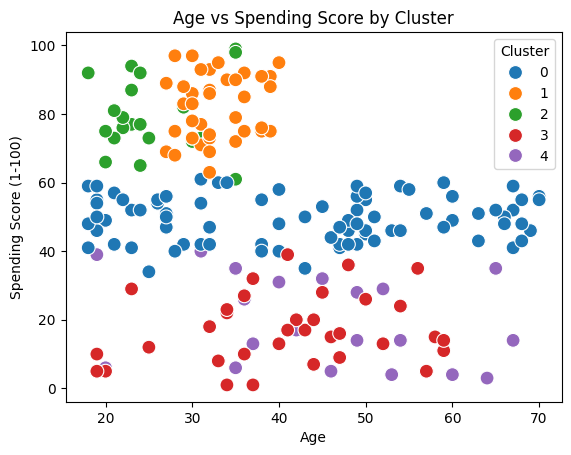

In [26]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title("Age vs Spending Score by Cluster")
plt.show()

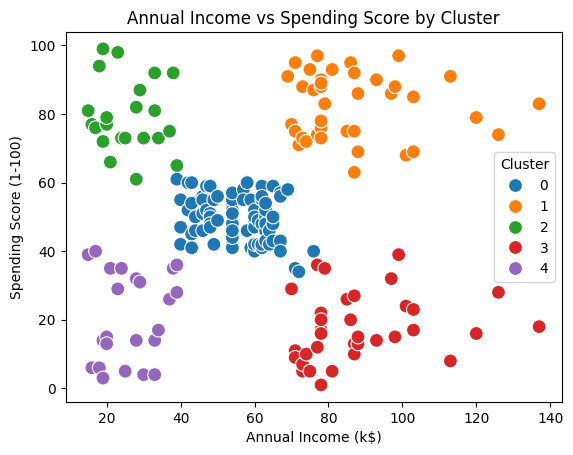

In [27]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title("Annual Income vs Spending Score by Cluster")
plt.show()

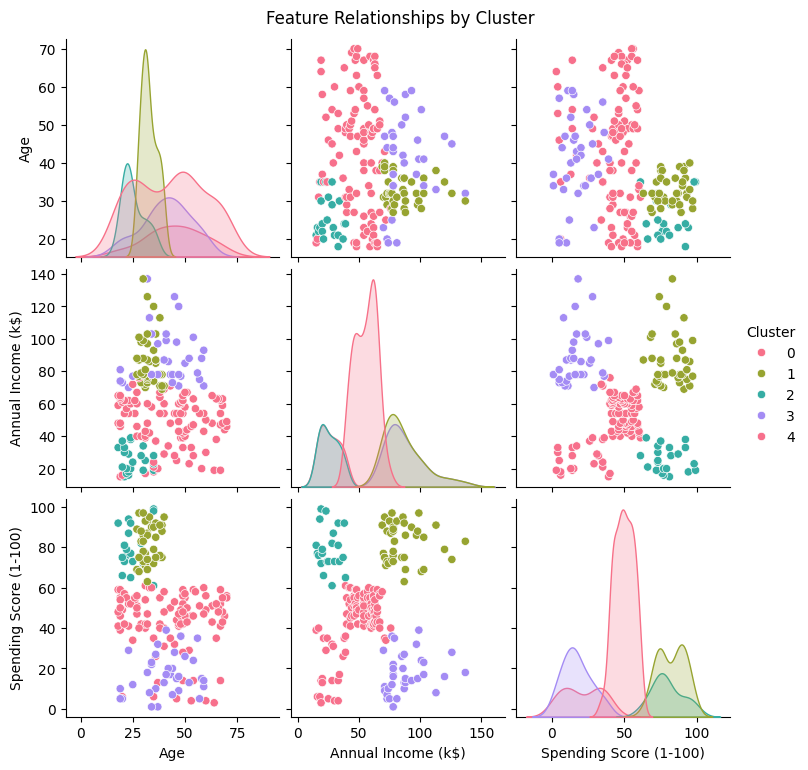

In [28]:
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='husl')
plt.suptitle("Feature Relationships by Cluster", y=1.02)
plt.show()

<ipython-input-29-504002550c96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='pastel')


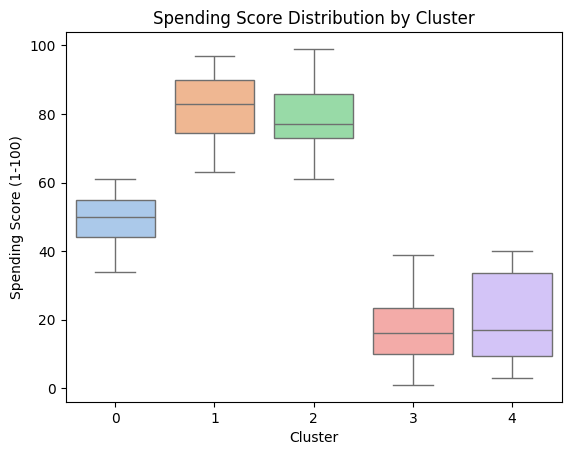

In [29]:
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='pastel')
plt.title("Spending Score Distribution by Cluster")
plt.show()

<ipython-input-30-1ce15161f2aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Age', palette='coolwarm')


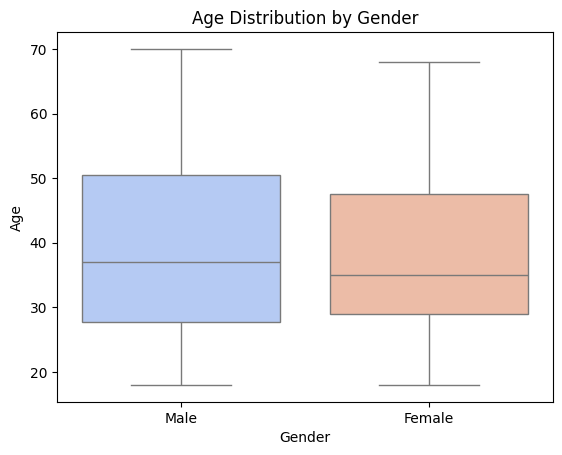

In [30]:
sns.boxplot(data=df, x='Gender', y='Age', palette='coolwarm')
plt.title("Age Distribution by Gender")
plt.show()

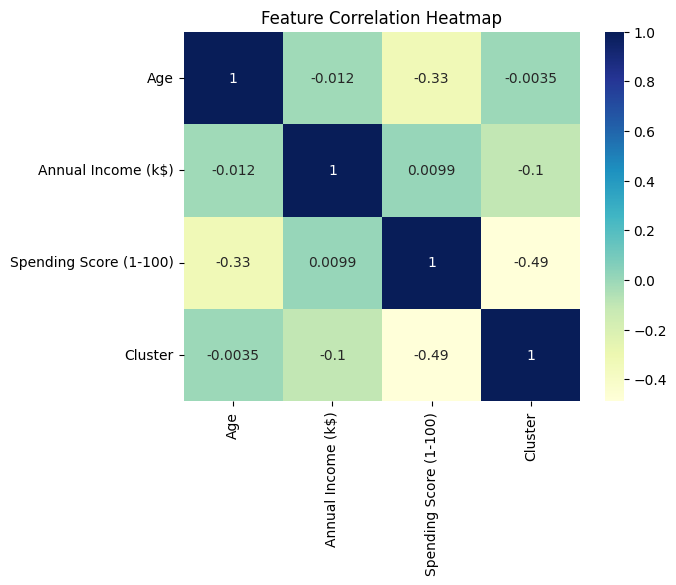

In [31]:
sns.heatmap(df.drop(columns=['CustomerID', 'Gender']).corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()